In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from isocodes import countries

pd.set_option('display.max_columns', 26) # show all columns in the output
sns.set_theme() # seaborn styling
sns.color_palette("tab10")

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [2]:
df = pd.read_csv('./data/WVS_Cross-National_Wave_7_csv_v6_0.csv',
                 sep=',',
                 usecols=[ # Because the dataset is huge, just import the following columns:
                     "A_YEAR", "B_COUNTRY_ALPHA", "J_INTDATE", # "A_STUDY", "A_WAVE", Metadaten des Interviews für die Auswertung
                     "G_TOWNSIZE", "G_TOWNSIZE2", "H_SETTLEMENT", "H_URBRURAL", # 
                     "Q5", "Q6", "Q7", "Q8", "Q9", "Q43", "Q44", # Social Values, Norms, Stereotypes
                     "Q66", "Q67", "Q71", "Q72", "Q73", # Social Capital, Trust and Organizational Memberships
                     "Q107", "Q108", "Q110", # Economic values
                     "Q122", # Migration
                     "Q235", # ... Political Culture and Political Regimes 
                ],
                dtype={'B_COUNTRY_ALPHA': 'category'} # just overriding this as everything else is correctly detected automatically by Pandas
)
df.rename(columns={
        "A_YEAR": "interview_year",
        "J_INTDATE": "interview_date",
        "B_COUNTRY_ALPHA": "country_iso",
        "G_TOWNSIZE": "townsize",
        "G_TOWNSIZE2": "townsize_2",
        "H_SETTLEMENT": "settlement",
        "H_URBRURAL": "urban_rural"
    },
    inplace=True
)

df.sample(n=10, random_state=2024)

,interview_year,country_iso,interview_date,townsize,townsize_2,settlement,urban_rural,Q5,Q6,Q7,Q8,Q9,Q43,Q44,Q66,Q67,Q71,Q72,Q73,Q107,Q108,Q110,Q122,Q235
17813,2018,CHN,20180807,7,4,4,1,2,3,1,1,1,3,1,2,2,2,2,2,4,4,5,0,2
35755,2018,IDN,20180604,2,1,5,2,1,1,1,2,2,1,2,3,3,3,3,3,8,7,7,0,4
27223,2022,GBR,20220526,7,4,2,1,2,4,1,2,2,1,1,3,3,3,4,3,5,3,6,2,1
76962,2020,SGP,-4,8,5,1,1,2,1,1,2,1,1,2,3,3,2,3,2,4,5,4,2,1
37488,2023,IND,20230609,6,3,3,1,1,1,1,1,1,3,1,4,4,4,4,4,1,-1,-1,0,-1
72202,2018,PRI,20180803,5,3,4,1,2,1,2,2,1,3,1,3,3,3,3,3,5,5,1,1,4
6214,2018,BGD,20181217,5,3,2,2,1,1,1,2,1,3,1,2,2,1,1,1,5,4,3,2,4
28422,2022,GBR,20220829,7,4,3,1,2,4,2,1,1,1,2,4,4,4,3,3,5,1,5,2,3
69886,2018,PER,20180904,1,1,5,2,1,1,2,2,1,1,1,2,2,2,3,2,7,7,6,0,2
90239,2017,USA,20170502,8,5,3,1,2,3,2,1,1,1,1,3,3,3,4,4,5,1,7,0,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97220 entries, 0 to 97219
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   interview_year  97220 non-null  int64   
 1   country_iso     97220 non-null  category
 2   interview_date  97220 non-null  int64   
 3   townsize        97220 non-null  int64   
 4   townsize_2      97220 non-null  int64   
 5   settlement      97220 non-null  int64   
 6   urban_rural     97220 non-null  int64   
 7   Q5              97220 non-null  int64   
 8   Q6              97220 non-null  int64   
 9   Q7              97220 non-null  int64   
 10  Q8              97220 non-null  int64   
 11  Q9              97220 non-null  int64   
 12  Q43             97220 non-null  int64   
 13  Q44             97220 non-null  int64   
 14  Q66             97220 non-null  int64   
 15  Q67             97220 non-null  int64   
 16  Q71             97220 non-null  int64   
 17  Q72         

### For further analysis: how many interviews conducted per country?

In [4]:
no_of_interviews_per_country_df = df.value_counts(subset=["country_iso"]).reset_index() # get answers as DAtaFrame instead of Series

no_of_interviews_per_country_df["country_name"] = no_of_interviews_per_country_df.apply(
    lambda x: countries.get(alpha_3=x["country_iso"])["name"] if countries.get(alpha_3=x["country_iso"]) else None,
    axis=1
)
no_of_interviews_per_country_df

,country_iso,count,country_name
0,CAN,4018,Canada
1,IDN,3200,Indonesia
2,CHN,3036,China
3,GBR,2609,United Kingdom
4,USA,2596,United States
...,...,...,...
61,ARG,1003,Argentina
62,URY,1000,Uruguay
63,CYP,1000,Cyprus
64,CHL,1000,Chile


In [5]:
no_of_interviews_per_country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   country_iso   66 non-null     category
 1   count         66 non-null     int64   
 2   country_name  65 non-null     object  
dtypes: category(1), int64(1), object(1)
memory usage: 3.8+ KB


In [6]:
# Our analysis focuses on these countries:
selected_countries = [
    "ARG", "USA", "ARM", "UZB", "DEU", "ZWE", "VNM", "GRC", "HKG", "JPN", "CHN"
]

# Checking number of interviews per selected country
no_of_interviews_per_country_df.loc[no_of_interviews_per_country_df["country_iso"].isin(selected_countries), :]

,country_iso,count,country_name
2,CHN,3036,China
4,USA,2596,United States
7,HKG,2075,Hong Kong
17,DEU,1528,Germany
22,JPN,1353,Japan
28,UZB,1250,Uzbekistan
33,ARM,1223,Armenia
35,ZWE,1215,Zimbabwe
42,VNM,1200,Viet Nam
48,GRC,1200,Greece


At least 1003 interviews for all selected countries. This is a good data basis for the analysis.

***
## 1) Economy
### 1.1) Relevant Questions: Q5 and Q43
- **Q5: Important in life: Work.**
    - Current view on the importance of work in the life of the respondent.
    - Possible answers: (1) Very important, (2) Rather important, (3) Not very important, (4) Not at all important
- **Q43: Future changes: Less importance placed on work.**
    - View on a decreasing importance of work in the life of the respondent.
    - Possible answers: (1) Good thing, (2) Don't mind, (3) Bad thing

### 1.2) Hypothesis
The higher a country's GDP per capita, the more importance is attached to work today and in the future.

This would mean: the higher a country's GDP per capita, the lower the values for Q5 and the higher the values for Q43.

### 1.3) Sources
Additional data used for [GDP data][1]:
- [World Bank (2023) – with minor processing by Our World in Data. “GDP per capita – World Bank – In constant 2017 international $” [dataset]. World Bank, “World Bank World Development Indicators” [original data]. Retrieved June 18, 2024 from https://ourworldindata.org/grapher/gdp-per-capita-worldbank][1]

[1]: https://ourworldindata.org/grapher/gdp-per-capita-worldbank

In [7]:
gdp_per_capita_df = pd.read_csv("./data/gdp-per-capita-worldbank.csv",
                 sep=",",
                 names=[
                     "country_name", "country_iso", "year", "gdp_per_capita"
                 ],
                 header=0,
                 dtype={
                     "country_name": "category",
                     "country_iso": "category"
                    } # just overriding this as everything else is correctly detected automatically by Pandas
)
gdp_per_capita_df

,country_name,country_iso,year,gdp_per_capita
0,Afghanistan,AFG,2002,1280.4631
1,Afghanistan,AFG,2003,1292.3335
2,Afghanistan,AFG,2004,1260.0605
3,Afghanistan,AFG,2005,1352.3207
4,Afghanistan,AFG,2006,1366.9932
...,...,...,...,...
6557,Zimbabwe,ZWE,2018,2399.6216
6558,Zimbabwe,ZWE,2019,2203.3967
6559,Zimbabwe,ZWE,2020,1990.3195
6560,Zimbabwe,ZWE,2021,2115.1445


In [8]:
gdp_per_capita_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6562 entries, 0 to 6561
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   country_name    6562 non-null   category
 1   country_iso     6133 non-null   category
 2   year            6562 non-null   int64   
 3   gdp_per_capita  6562 non-null   float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 135.5 KB


In [9]:
# There are rows where country_iso is null, so after short look into the CSV,
# Drop rows for regions (e.g. EU) without iso_code
gdp_per_capita_df.dropna(axis=0, inplace=True)
gdp_per_capita_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6133 entries, 0 to 6561
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   country_name    6133 non-null   category
 1   country_iso     6133 non-null   category
 2   year            6133 non-null   int64   
 3   gdp_per_capita  6133 non-null   float64 
dtypes: category(2), float64(1), int64(1)
memory usage: 174.9 KB


In [10]:
# Select most recent data of the dataset (2022)
gdp_per_capita_df = gdp_per_capita_df.loc[gdp_per_capita_df["year"]==2022,:]
gdp_per_capita_df

,country_name,country_iso,year,gdp_per_capita
52,Albania,ALB,2022,15492.0670
85,Algeria,DZA,2022,11198.2330
118,Angola,AGO,2022,5906.1157
151,Antigua and Barbuda,ATG,2022,22321.8700
184,Argentina,ARG,2022,22461.4410
...,...,...,...,...
6429,Vanuatu,VUT,2022,2785.9038
6462,Vietnam,VNM,2022,11396.5310
6495,World,OWID_WRL,2022,17527.1900
6528,Zambia,ZMB,2022,3365.8738


In [11]:
# Answers that have a value of < 0 are of type "Don't know", "No answer", "Not asked" or "Missing / N/A"
# We will exlude them in the further analysis for both relevant questions
valid_answers_filtered_df = df.loc[(df["Q5"] > 0) & (df["Q43"] > 0) & (df["Q71"] > 0) & (df["Q72"] > 0) & (df["Q73"] > 0), :]

In [12]:
# .describe() already offers the mean and std-deviation over all rows
# This is what we need for further analysis
q5_description_df = valid_answers_filtered_df.groupby(by="country_iso", observed=False).describe()["Q5"]
q43_description_df = valid_answers_filtered_df.groupby(by="country_iso", observed=False).describe()["Q43"]

# Preparation for section 2):
q71_description_df = valid_answers_filtered_df.groupby(by="country_iso", observed=False).describe()["Q71"]
q72_description_df = valid_answers_filtered_df.groupby(by="country_iso", observed=False).describe()["Q72"]
q73_description_df = valid_answers_filtered_df.groupby(by="country_iso", observed=False).describe()["Q73"]

q43_description_df

,count,mean,std,min,25%,50%,75%,max
country_iso,,,,,,,,
AND,967.0,1.805584,0.823723,1.0,1.0,2.0,3.0,3.0
ARG,897.0,2.424749,0.775727,1.0,2.0,3.0,3.0,3.0
ARM,1116.0,2.376344,0.887348,1.0,1.0,3.0,3.0,3.0
AUS,1679.0,1.831447,0.754525,1.0,1.0,2.0,2.0,3.0
BGD,1128.0,2.804078,0.568081,1.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...
USA,2530.0,1.941107,0.774807,1.0,1.0,2.0,3.0,3.0
UZB,1153.0,1.775369,0.589860,1.0,1.0,2.0,2.0,3.0
VEN,1190.0,2.562185,0.721471,1.0,2.0,3.0,3.0,3.0


In [13]:
economy_analysis_df = gdp_per_capita_df.join(q5_description_df, on="country_iso", how="inner")
economy_analysis_df = economy_analysis_df.join(q43_description_df, on="country_iso", how="inner", rsuffix="_q43").dropna()
economy_analysis_df.sample(20)

,country_name,country_iso,year,gdp_per_capita,count,mean,std,min,25%,50%,75%,max,count_q43,mean_q43,std_q43,min_q43,25%_q43,50%_q43,75%_q43,max_q43
4907,Romania,ROU,2022,32495.9080,1118.0,1.733453,0.788553,1.0,1.0,2.0,2.0,4.0,1118.0,2.487478,0.782144,1.0,2.0,3.0,3.0,3.0
6297,United States,USA,2022,64623.1250,2530.0,1.860474,0.849196,1.0,1.0,2.0,2.0,4.0,2530.0,1.941107,0.774807,1.0,1.0,2.0,3.0,3.0
806,Brazil,BRA,2022,15093.4650,1631.0,1.440834,0.612768,1.0,1.0,1.0,2.0,4.0,1631.0,2.058860,0.871621,1.0,1.0,2.0,3.0,3.0
5345,Singapore,SGP,2022,108036.1100,1880.0,1.859574,0.810038,1.0,1.0,2.0,2.0,4.0,1880.0,1.982447,0.765967,1.0,1.0,2.0,3.0,3.0
6462,Vietnam,VNM,2022,11396.5310,1156.0,1.358131,0.604266,1.0,1.0,1.0,2.0,4.0,1156.0,2.132353,0.907282,1.0,1.0,2.0,3.0,3.0
2967,Jordan,JOR,2022,9490.6670,765.0,1.386928,0.775500,1.0,1.0,1.0,1.0,4.0,765.0,2.244444,0.938759,1.0,1.0,3.0,3.0,3.0
3145,Kyrgyzstan,KGZ,2022,5070.1504,1114.0,1.578097,0.753373,1.0,1.0,1.0,2.0,4.0,1114.0,2.412029,0.838151,1.0,2.0,3.0,3.0,3.0
4055,Morocco,MAR,2022,8083.3650,1200.0,1.223333,0.538855,1.0,1.0,1.0,1.0,4.0,1200.0,2.443333,0.875077,1.0,1.0,3.0,3.0,3.0
5824,Tajikistan,TJK,2022,4137.2780,1068.0,1.554307,0.763415,1.0,1.0,1.0,2.0,4.0,1068.0,2.431648,0.842860,1.0,2.0,3.0,3.0,3.0
2351,Guatemala,GTM,2022,9162.0530,1229.0,1.459723,0.629912,1.0,1.0,1.0,2.0,4.0,1229.0,2.174939,0.898509,1.0,1.0,3.0,3.0,3.0


In [14]:
# Filter data for selected_countries
economy_analysis_df = economy_analysis_df.loc[economy_analysis_df["country_iso"].isin(selected_countries), :]
economy_analysis_df["country_name"].describe()

count           11
unique          11
top       Zimbabwe
freq             1
Name: country_name, dtype: object

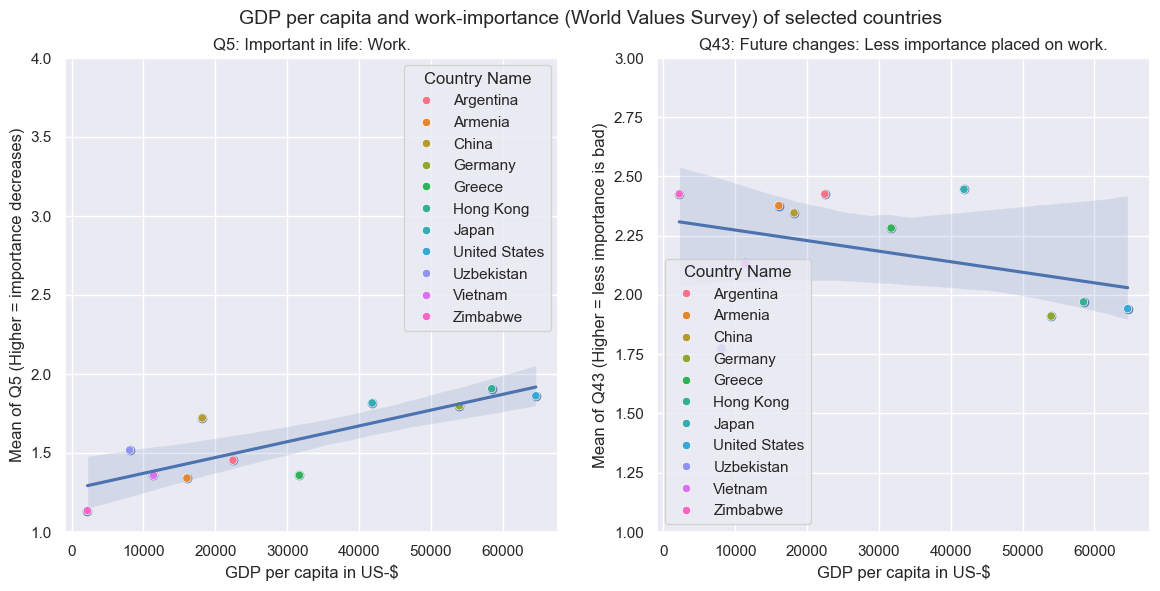

In [15]:
# Get unique values for hue because just using hue="country_name" will show all possible categeorical values,
# even though economy_analysis_df["country_name"].describe() shows it only has 11 unique values...
unique_country_names = economy_analysis_df["country_name"].unique()

fig, axs = plt.subplots(1,2, figsize=(14,6))

sns.regplot(x="gdp_per_capita",
            y="mean",
            #hue="country_iso",
            ax=axs[0],
            #sizes=(40, 400),
            ci=95,
            data=economy_analysis_df
)
q5_plot = sns.scatterplot(x="gdp_per_capita",
            y="mean",
            hue="country_name",
            hue_order=unique_country_names,
            ax=axs[0],
            #sizes=(40, 400),
            data=economy_analysis_df
)
q5_plot.set_ylim(bottom=1, top=4)
q5_plot.set_ylabel("Mean of Q5 (Higher = importance decreases)")
q5_plot.set_xlabel("GDP per capita in US-$")
q5_plot.set_title("Q5: Important in life: Work.")

sns.regplot(x="gdp_per_capita",
            y="mean_q43",
            #hue="country_iso",
            ax=axs[1],
            #sizes=(40, 400),
            ci=95,
            data=economy_analysis_df
)
q43_plot = sns.scatterplot(x="gdp_per_capita",
            y="mean_q43",
            hue="country_name",
            hue_order=unique_country_names,
            ax=axs[1],
            #sizes=(40, 400),
            data=economy_analysis_df
)
q43_plot.set_ylim(bottom=1, top=3)
q43_plot.set_ylabel("Mean of Q43 (Higher = less importance is bad)")
q43_plot.set_xlabel("GDP per capita in US-$")
q43_plot.set_title("Q43: Future changes: Less importance placed on work.")

axs[0].legend(title="Country Name")
axs[1].legend(title="Country Name")

fig.suptitle('GDP per capita and work-importance (World Values Survey) of selected countries', fontsize=14)
fig.subplots_adjust(top=0.9)

plt.show()

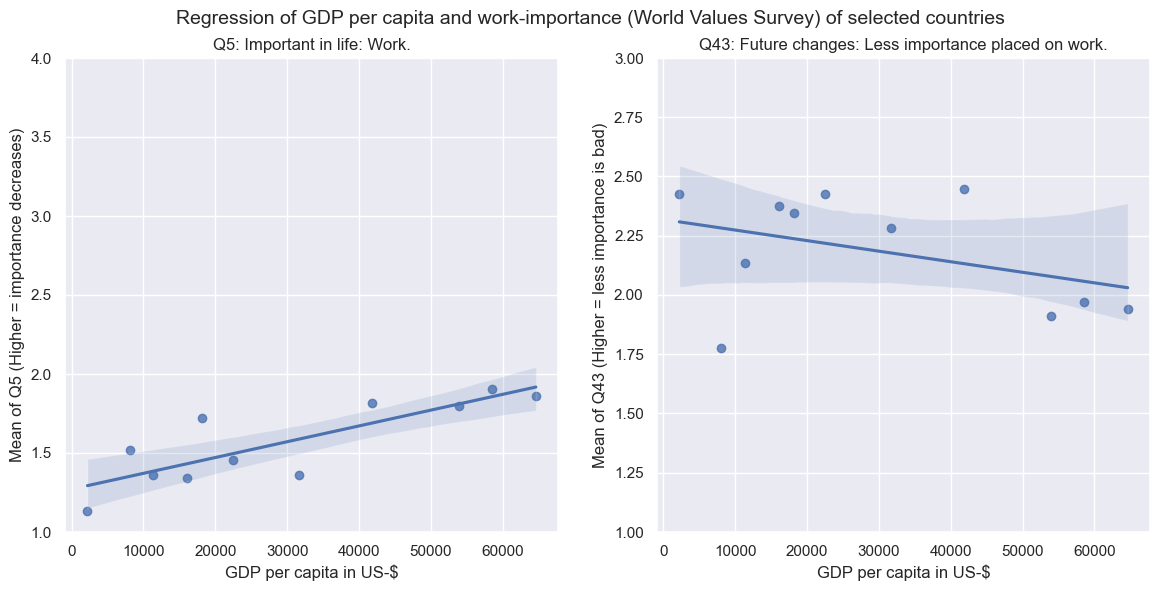

In [16]:
# REGRESSION: Plot GDP per capita against mean of Q5 and Q43
fig, axs = plt.subplots(1,2, figsize=(14,6))
q5_plot = sns.regplot(x="gdp_per_capita",
            y="mean",
            #hue="country_iso",
            ax=axs[0],
            #sizes=(40, 400),
            ci=95,
            data=economy_analysis_df
)
q5_plot.set_ylim(bottom=1, top=4)
q5_plot.set_ylabel("Mean of Q5 (Higher = importance decreases)")
q5_plot.set_xlabel("GDP per capita in US-$")
q5_plot.set_title("Q5: Important in life: Work.")

q43_plot = sns.regplot(x="gdp_per_capita",
            y="mean_q43",
            #hue="country_iso",
            ax=axs[1],
            #sizes=(40, 400),
            ci=95,
            data=economy_analysis_df
)
q43_plot.set_ylim(bottom=1, top=3)
q43_plot.set_ylabel("Mean of Q43 (Higher = less importance is bad)")
q43_plot.set_xlabel("GDP per capita in US-$")
q43_plot.set_title("Q43: Future changes: Less importance placed on work.")

fig.suptitle('Regression of GDP per capita and work-importance (World Values Survey) of selected countries', fontsize=14)
fig.subplots_adjust(top=0.9)

### 1.4) Verification of the Hypothesis
**Assumption:**

The higher a country's GDP per capita, the more importance is attached to work 1) today and 2) in the future.

This would mean: the higher a country's GDP per capita, 1) the lower the values for Q5 and 2) the higher the values for Q43.

**Actual result:**

🚧 1) Q5 - Assumption not approved: The higher a country's GDP per capita, the higher the values for Q5. Without further investigating R^2 and error values, there seems to be a positive correlation between GDP per capita and a decrease in the importance of work in life.

🚧 2) Q43 - Not approved: The higher a country's GDP per capita, the lower the values for Q43.
Compared to Q5, comparatively big confidence interval for 5% error (95% CI). Therefore, the question arises whether there's an acutal correlation between these data points.

Next step: evalute R^2-values for each plot to see whether there's an actual correlation.

***
## 2) Human Development Index
"The Human Development Index (HDI) is a statistical **composite index of life expectancy, education** (mean years of schooling completed and expected years of schooling upon entering the education system), **and per capita income indicators**, which is used to rank countries into four tiers of human development. A country scores a higher level of HDI when the lifespan is higher, the education level is higher, and the gross national income GNI (PPP) per capita is higher. It was developed by Pakistani economist Mahbub ul-Haq and was further used to measure a country's development by the United Nations Development Programme (UNDP)'s Human Development Report Office." ([1])

### 2.1) Relevant Questions: Q71, Q72, Q73
- **Q71: Confidence: The Government**
    - Level of conficence placed in the government.
    - Possible answers: (1) A great deal, (2) Quite a lot, (3) Not very much, (4) None at all
- **Q72: Confidence: The Political Parties**
    - Level of conficence placed in political parties.
    - Possible answers: (1) A great deal, (2) Quite a lot, (3) Not very much, (4) None at all
- **Q73: Confidence: Parliament**
    - Level of conficence placed in parliament.
    - Possible answers: (1) A great deal, (2) Quite a lot, (3) Not very much, (4) None at all

### 2.2) Hypothesis
The higher a country's HDI value, the higher the respective confidence values for government, political parties and parliament.

This would mean: the higher a country's HDI value, the lower the values for Q71, Q72 and Q73 (indicating a great deal of trust).

### 2.3) Sources
Additional data used, including the [HDI data set][2]:
- [Wikipedia contributors, "Human Development Index," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Human_Development_Index&oldid=1224289494 (accessed June 20, 2024).][1]
- [Banerjee, Sourav (2024) "Human Development World Index", https://www.kaggle.com/datasets/iamsouravbanerjee/human-development-index-dataset (accessed June 20, 2024)][2]

[1]: https://en.wikipedia.org/wiki/Human_Development_Index
[2]: https://www.kaggle.com/datasets/iamsouravbanerjee/human-development-index-dataset

In [17]:
hdi_df = pd.read_csv("./data/hdi_full.csv",
                 sep=",",
                 usecols=[ # Because the dataset is huge, just import the following columns with most recent HDI index data:
                     "ISO3", "Country", "Human Development Index (2021)"
                ],
                dtype={
                    "ISO3": "category",
                    "Country": "category"
                } # just overriding this as everything else is correctly detected automatically by Pandas
)
hdi_df.rename(columns={
    "ISO3": "country_iso",
    "Country": "country_name",
    "Human Development Index (2021)": "hdi_2021"
}, inplace=True)
hdi_df

,country_iso,country_name,hdi_2021
0,AFG,Afghanistan,0.478
1,AGO,Angola,0.586
2,ALB,Albania,0.796
3,AND,Andorra,0.858
4,ARE,United Arab Emirates,0.911
...,...,...,...
190,WSM,Samoa,0.707
191,YEM,Yemen,0.455
192,ZAF,South Africa,0.713
193,ZMB,Zambia,0.565


In [18]:
hdi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   country_iso   195 non-null    category
 1   country_name  195 non-null    category
 2   hdi_2021      191 non-null    float64 
dtypes: category(2), float64(1)
memory usage: 9.5 KB


In [19]:
hdi_df.dropna(axis=0, inplace=True) # delete 4 entries without an HDI 2021 index value

In [20]:
hdi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 0 to 194
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   country_iso   191 non-null    category
 1   country_name  191 non-null    category
 2   hdi_2021      191 non-null    float64 
dtypes: category(2), float64(1)
memory usage: 10.8 KB


In [21]:
# Select data for the countries we are interested in
hdi_df = hdi_df.loc[hdi_df["country_iso"].isin(selected_countries), :]

In [22]:
hdi_analysis_df = hdi_df.join(q71_description_df, on="country_iso")
hdi_analysis_df = hdi_analysis_df.join(q72_description_df, on="country_iso", rsuffix="_q72")
hdi_analysis_df = hdi_analysis_df.join(q73_description_df, on="country_iso", rsuffix="_q73").dropna()
hdi_analysis_df.info()
hdi_analysis_df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 5 to 194
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   country_iso   11 non-null     object  
 1   country_name  11 non-null     category
 2   hdi_2021      11 non-null     float64 
 3   count         11 non-null     float64 
 4   mean          11 non-null     float64 
 5   std           11 non-null     float64 
 6   min           11 non-null     float64 
 7   25%           11 non-null     float64 
 8   50%           11 non-null     float64 
 9   75%           11 non-null     float64 
 10  max           11 non-null     float64 
 11  count_q72     11 non-null     float64 
 12  mean_q72      11 non-null     float64 
 13  std_q72       11 non-null     float64 
 14  min_q72       11 non-null     float64 
 15  25%_q72       11 non-null     float64 
 16  50%_q72       11 non-null     float64 
 17  75%_q72       11 non-null     float64 
 18  max_q72       11

,country_iso,country_name,hdi_2021,count,mean,std,min,25%,50%,75%,max,count_q72,mean_q72,...,min_q72,25%_q72,50%_q72,75%_q72,max_q72,count_q73,mean_q73,std_q73,min_q73,25%_q73,50%_q73,75%_q73,max_q73
87,JPN,Japan,0.925,1126.0,2.658970,0.718668,1.0,2.0,3.0,3.0,4.0,1126.0,2.824156,...,1.0,2.0,3.0,3.0,4.0,1126.0,2.772647,0.696530,1.0,2.0,3.0,3.0,4.0
72,HKG,Hong Kong,0.952,2021.0,2.513607,0.832768,1.0,2.0,2.0,3.0,4.0,2021.0,2.953488,...,1.0,3.0,3.0,3.0,4.0,2021.0,2.802078,0.720572,1.0,2.0,3.0,3.0,4.0
194,ZWE,Zimbabwe,0.593,1185.0,2.535865,1.047328,1.0,2.0,2.0,3.0,4.0,1185.0,2.982278,...,1.0,2.0,3.0,4.0,4.0,1185.0,2.700422,1.001962,1.0,2.0,3.0,4.0,4.0
44,DEU,Germany,0.942,1356.0,2.636431,0.746831,1.0,2.0,3.0,3.0,4.0,1356.0,2.910029,...,1.0,3.0,3.0,3.0,4.0,1356.0,2.632006,0.740684,1.0,2.0,3.0,3.0,4.0
5,ARG,Argentina,0.842,897.0,2.929766,0.889281,1.0,2.0,3.0,4.0,4.0,897.0,3.243032,...,1.0,3.0,3.0,4.0,4.0,897.0,3.074693,0.760342,1.0,3.0,3.0,4.0,4.0
184,USA,United States,0.921,2530.0,2.924506,0.912672,1.0,2.0,3.0,4.0,4.0,2530.0,3.145455,...,1.0,3.0,3.0,4.0,4.0,2530.0,3.096838,0.655685,1.0,3.0,3.0,4.0,4.0
68,GRC,Greece,0.887,1069.0,3.347053,0.734543,1.0,3.0,3.0,4.0,4.0,1069.0,3.445276,...,1.0,3.0,4.0,4.0,4.0,1069.0,3.315248,0.716813,1.0,3.0,3.0,4.0,4.0
185,UZB,Uzbekistan,0.727,1153.0,1.712923,0.790557,1.0,1.0,2.0,2.0,4.0,1153.0,2.129228,...,1.0,1.0,2.0,3.0,4.0,1153.0,1.952298,0.902531,1.0,1.0,2.0,2.0,4.0
188,VNM,Viet Nam,0.703,1156.0,1.696367,0.593197,1.0,1.0,2.0,2.0,4.0,1156.0,1.793253,...,1.0,1.0,2.0,2.0,4.0,1156.0,1.729239,0.585726,1.0,1.0,2.0,2.0,4.0
32,CHN,China,0.768,2983.0,1.560174,0.601515,1.0,1.0,2.0,2.0,4.0,2983.0,1.719745,...,1.0,1.0,2.0,2.0,4.0,2983.0,1.692591,0.630944,1.0,1.0,2.0,2.0,4.0


In [23]:
# Just for fun, and just because we can, let's combine this also with the GDP per capita data:
# For that, because we see above that hdi_analysis_df["country_iso"] has type object, we need to change that datatype first
hdi_analysis_df["country_iso"] = hdi_analysis_df["country_iso"].astype("category")
hdi_analysis_df.set_index(keys="country_iso", inplace=True) # set index of this df to country_iso as preparation for the join (join on the index)

hdi_analysis_df = gdp_per_capita_df.join(hdi_analysis_df, on="country_iso", rsuffix="_gdp")
hdi_analysis_df = hdi_analysis_df.dropna(axis=0)

In [24]:
hdi_analysis_df.sample(10)

,country_name,country_iso,year,gdp_per_capita,country_name_gdp,hdi_2021,count,mean,std,min,25%,50%,75%,...,min_q72,25%_q72,50%_q72,75%_q72,max_q72,count_q73,mean_q73,std_q73,min_q73,25%_q73,50%_q73,75%_q73,max_q73
6462,Vietnam,VNM,2022,11396.531,Viet Nam,0.703,1156.0,1.696367,0.593197,1.0,1.0,2.0,2.0,...,1.0,1.0,2.0,2.0,4.0,1156.0,1.729239,0.585726,1.0,1.0,2.0,2.0,4.0
184,Argentina,ARG,2022,22461.441,Argentina,0.842,897.0,2.929766,0.889281,1.0,2.0,3.0,4.0,...,1.0,3.0,3.0,4.0,4.0,897.0,3.074693,0.760342,1.0,3.0,3.0,4.0,4.0
2582,Hong Kong,HKG,2022,58478.883,Hong Kong,0.952,2021.0,2.513607,0.832768,1.0,2.0,2.0,3.0,...,1.0,3.0,3.0,3.0,4.0,2021.0,2.802078,0.720572,1.0,2.0,3.0,3.0,4.0
2219,Germany,DEU,2022,53969.625,Germany,0.942,1356.0,2.636431,0.746831,1.0,2.0,3.0,3.0,...,1.0,3.0,3.0,3.0,4.0,1356.0,2.632006,0.740684,1.0,2.0,3.0,3.0,4.0
2934,Japan,JPN,2022,41837.910,Japan,0.925,1126.0,2.658970,0.718668,1.0,2.0,3.0,3.0,...,1.0,2.0,3.0,3.0,4.0,1126.0,2.772647,0.696530,1.0,2.0,3.0,3.0,4.0
1216,China,CHN,2022,18187.842,China,0.768,2983.0,1.560174,0.601515,1.0,1.0,2.0,2.0,...,1.0,1.0,2.0,2.0,4.0,2983.0,1.692591,0.630944,1.0,1.0,2.0,2.0,4.0
6297,United States,USA,2022,64623.125,United States,0.921,2530.0,2.924506,0.912672,1.0,2.0,3.0,4.0,...,1.0,3.0,3.0,4.0,4.0,2530.0,3.096838,0.655685,1.0,3.0,3.0,4.0,4.0
217,Armenia,ARM,2022,16057.007,Armenia,0.759,1116.0,2.922939,1.028462,1.0,2.0,3.0,4.0,...,1.0,3.0,4.0,4.0,4.0,1116.0,3.258961,0.850302,1.0,3.0,3.0,4.0,4.0
6561,Zimbabwe,ZWE,2022,2207.957,Zimbabwe,0.593,1185.0,2.535865,1.047328,1.0,2.0,2.0,3.0,...,1.0,2.0,3.0,4.0,4.0,1185.0,2.700422,1.001962,1.0,2.0,3.0,4.0,4.0
2285,Greece,GRC,2022,31704.426,Greece,0.887,1069.0,3.347053,0.734543,1.0,3.0,3.0,4.0,...,1.0,3.0,4.0,4.0,4.0,1069.0,3.315248,0.716813,1.0,3.0,3.0,4.0,4.0


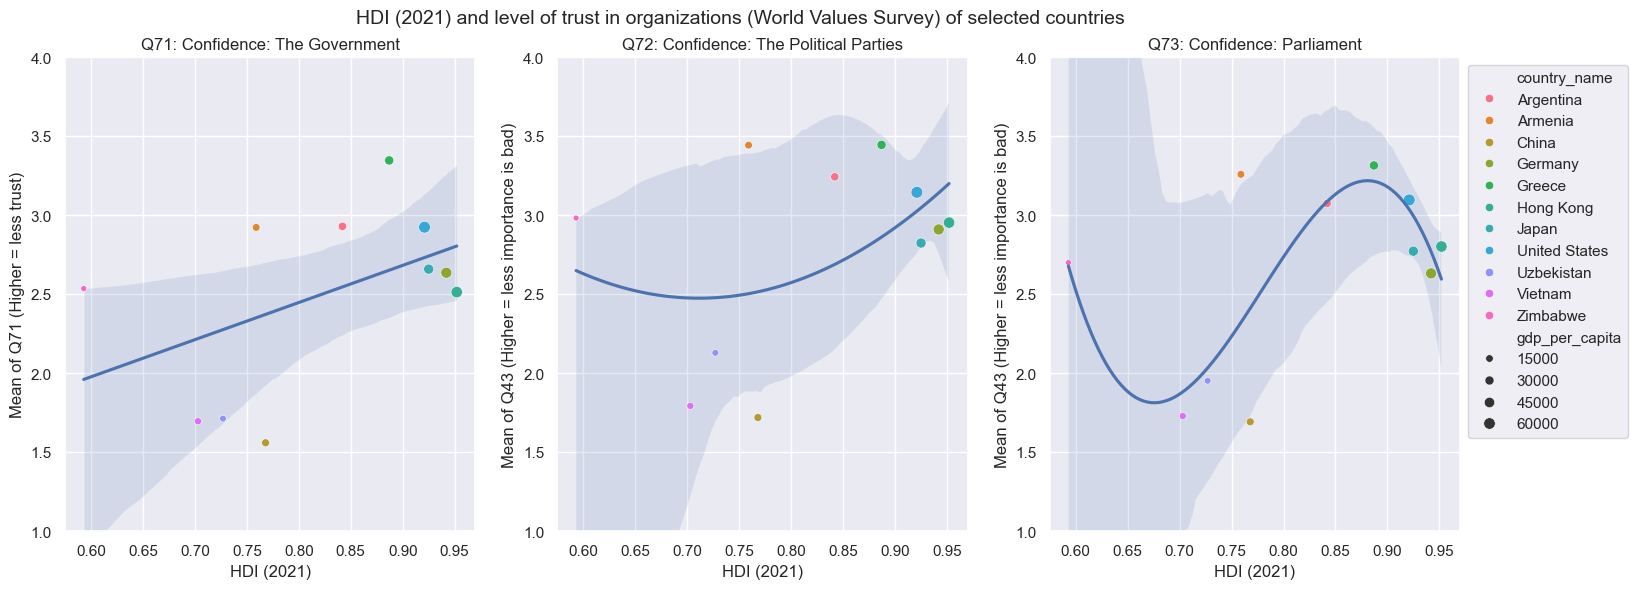

In [25]:
# Get unique values for hue because just using hue="country_name" will show all possible categeorical values,
# even though economy_analysis_df["country_name"].describe() shows it only has 11 unique values...
unique_country_names = hdi_analysis_df["country_name"].unique()

fig, axs = plt.subplots(1,3, figsize=(18,6))

# Choosing linear, quadratic and cubic regression plots for illustrative purposes - Which one seems to fit best?
sns.regplot(x="hdi_2021",
            y="mean",
            ax=axs[0],
            scatter=False,
            order=1, # linear
            data=hdi_analysis_df
)
q71_plot = sns.scatterplot(x="hdi_2021",
            y="mean",
            hue="country_name",
            size="gdp_per_capita",
            hue_order=unique_country_names,
            ax=axs[0],
            data=hdi_analysis_df
)
q71_plot.set_ylim(bottom=1, top=4)
q71_plot.set_ylabel("Mean of Q71 (Higher = less trust)")
q71_plot.set_xlabel("HDI (2021)")
q71_plot.set_title("Q71: Confidence: The Government")
q71_plot.get_legend().remove()

sns.regplot(x="hdi_2021",
            y="mean_q72",
            ax=axs[1],
            scatter=False,
            order=2, # quadratic
            data=hdi_analysis_df
)
q72_plot = sns.scatterplot(x="hdi_2021",
            y="mean_q72",
            hue="country_name",
            size="gdp_per_capita",
            hue_order=unique_country_names,
            ax=axs[1],
            data=hdi_analysis_df
)
q72_plot.set_ylim(bottom=1, top=4)
q72_plot.set_ylabel("Mean of Q43 (Higher = less importance is bad)")
q72_plot.set_xlabel("HDI (2021)")
q72_plot.set_title("Q72: Confidence: The Political Parties")
q72_plot.get_legend().remove()

sns.regplot(x="hdi_2021",
            y="mean_q73",
            ax=axs[2],
            scatter=False,
            order=3, # cubic
            data=hdi_analysis_df
)
q73_plot = sns.scatterplot(x="hdi_2021",
            y="mean_q73",
            hue="country_name",
            size="gdp_per_capita",
            hue_order=unique_country_names,
            ax=axs[2],
            data=hdi_analysis_df
)
q73_plot.set_ylim(bottom=1, top=4)
q73_plot.set_ylabel("Mean of Q43 (Higher = less importance is bad)")
q73_plot.set_xlabel("HDI (2021)")
q73_plot.set_title("Q73: Confidence: Parliament")

fig.suptitle("HDI (2021) and level of trust in organizations (World Values Survey) of selected countries", fontsize=14)
fig.subplots_adjust(top=0.9)

sns.move_legend(q73_plot, "upper left", bbox_to_anchor=(1, 1))

plt.show()

### 2.4) Verification of the Hypothesis
**Assumption:**

The higher a country's HDI value, the higher the respective confidence values for 1) government, 2) political parties and 3) parliament.

This would mean: the higher a country's HDI value, the lower the values for 1) Q71, 2) Q72 and 3) Q73 (indicating a great deal of trust).

**Actual result:**

🚧 1), 2) and 3) Q71, Q72, and Q73 - Assumption not approved: For the countries selected in this research, HDI does not uniformly positively affect the trust in political institutions. For countries such as China or Zimbabwe, trust indicators are relatively high according to the World Values Survey interview data, while for countries such as Argentina or Greece, that both have a higher HDI, trust in government, political parties and parliament is drastically lower. The three countries with the highest HDI values (and GDP per capita), Hong Kong, Japan and Germany, have higher trust values than Argentina and Greece, however lower trust values in comparison to China and Zimbabwe.

Overall, these graphs illustrate a complex relationship between HDI and trust in various governmental institutions. Higher HDI does not uniformly correlate with higher trust, indicating other influencing factors (e.g. political system).

Next step: evalute R^2-values for each plot to see whether there's an actual correlation - using linear, quadratic and cubic regression plots. Hypothesis: cubic regression will have lowest error values